###### importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sklearn libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# metrics imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_roc_curve

## data dictionary
## bank client data:
* age (numeric)
* job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default: has credit in default? (categorical: "no","yes","unknown")
* housing: has housing loan? (categorical: "no","yes","unknown")
* loan: has personal loan? (categorical: "no","yes","unknown")
## related with the last contact of the current campaign:
* contact: contact communication type (categorical: "cellular","telephone") 
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
## social and economic context attributes
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)     
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

* Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
df=pd.read_csv("bank-additional-fullPRCP.csv", low_memory=False)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56,57,37,40,56,45,59,41,24,25,...,62,64,36,37,29,73,46,56,44,74
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,...,retired,retired,admin.,admin.,unemployed,retired,blue-collar,retired,technician,retired
marital,married,married,married,married,married,married,married,married,single,single,...,married,divorced,married,married,single,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,...,university.degree,professional.course,university.degree,university.degree,basic.4y,professional.course,professional.course,university.degree,professional.course,professional.course
default,no,unknown,no,no,no,unknown,no,unknown,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,...,no,yes,no,yes,yes,yes,no,yes,no,yes
loan,no,no,no,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,...,thu,fri,fri,fri,fri,fri,fri,fri,fri,fri


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [7]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='pdays', ylabel='Density'>

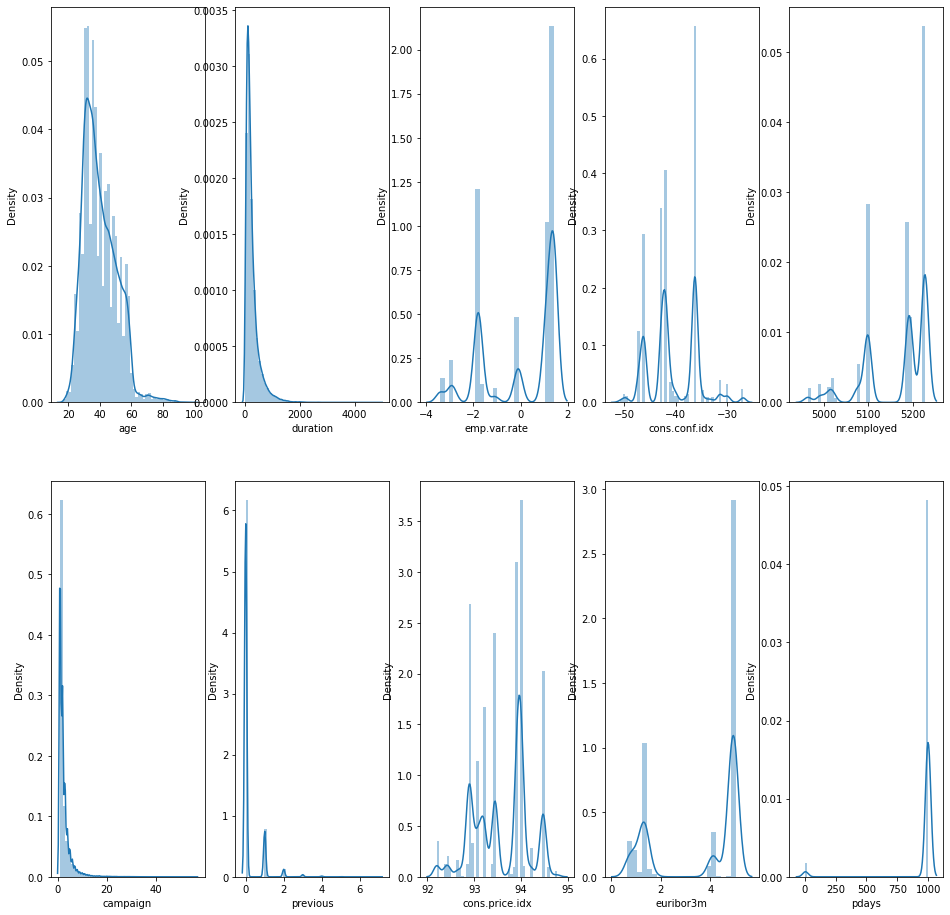

In [8]:
figure,ax=plt.subplots(2,5, figsize=(16,16))
sns.distplot(df["age"],ax=ax[0,0])
sns.distplot(df["duration"],ax=ax[0,1])
sns.distplot(df["campaign"],ax=ax[1,0])
sns.distplot(df["previous"],ax=ax[1,1])
sns.distplot(df["emp.var.rate"],ax=ax[0,2])
sns.distplot(df["cons.price.idx"],ax=ax[1,2])
sns.distplot(df["cons.conf.idx"], ax=ax[0,3])
sns.distplot(df["euribor3m"], ax=ax[1,3])
sns.distplot(df["nr.employed"], ax=ax[0,4])
sns.distplot(df["pdays"], ax=ax[1,4])

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4964,no


In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56,57,37,40,56,45,59,41,24,25,...,62,64,36,37,29,73,46,56,44,74
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,...,retired,retired,admin.,admin.,unemployed,retired,blue-collar,retired,technician,retired
marital,married,married,married,married,married,married,married,married,single,single,...,married,divorced,married,married,single,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,...,university.degree,professional.course,university.degree,university.degree,basic.4y,professional.course,professional.course,university.degree,professional.course,professional.course
default,no,unknown,no,no,no,unknown,no,unknown,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,...,no,yes,no,yes,yes,yes,no,yes,no,yes
loan,no,no,no,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,...,thu,fri,fri,fri,fri,fri,fri,fri,fri,fri


In [12]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df.value_counts("y")

y  
no     36548
yes     4640
dtype: int64

* observation: as the data set is not balanced, it is to be balanced by using SMOTE analysis

In [14]:
df["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

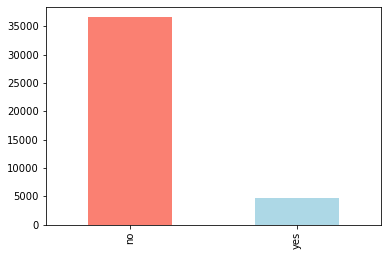

In [15]:
df["y"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

* observation: as it is an imbalanced dataset with target no is more, it needs to be worked to make imbalanced data equal so it will not affect accuracy

## checking for categorical variables

In [16]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


In [17]:
pd.Categorical(df["job"]).codes

array([3, 7, 7, ..., 5, 9, 5], dtype=int8)

In [18]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes+1

In [19]:
pd.Categorical(df["job"]).codes+1

array([ 4,  8,  8, ...,  6, 10,  6], dtype=int8)

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,1,1,1,2,7,2,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
1,57,8,2,4,2,1,1,2,7,2,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
2,37,8,2,4,1,3,1,2,7,2,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
3,40,1,2,2,1,1,1,2,7,2,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1
4,56,8,2,4,1,1,3,2,7,2,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int8   
 2   marital         41188 non-null  int8   
 3   education       41188 non-null  int8   
 4   default         41188 non-null  int8   
 5   housing         41188 non-null  int8   
 6   loan            41188 non-null  int8   
 7   contact         41188 non-null  int8   
 8   month           41188 non-null  int8   
 9   day_of_week     41188 non-null  int8   
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int8   
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
df.shape

(41188, 21)

In [23]:
df.index

RangeIndex(start=0, stop=41188, step=1)

In [24]:
len(df)

41188

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [26]:
df.drop(["contact","day_of_week","month","campaign","education","emp.var.rate","nr.employed","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed"], axis=1, inplace=True)

In [27]:
x= df.drop("y", axis=1)
y=df["y"]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
DF=df.drop("y", axis=1)
DF

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome
0,56,4,2,1,1,1,261,999,0,2
1,57,8,2,2,1,1,149,999,0,2
2,37,8,2,1,3,1,226,999,0,2
3,40,1,2,1,1,1,151,999,0,2
4,56,8,2,1,1,3,307,999,0,2
...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,1,3,1,334,999,0,2
41184,46,2,2,1,1,1,383,999,0,2
41185,56,6,2,1,3,1,189,999,0,2
41186,44,10,2,1,1,1,442,999,0,2


In [30]:
DF

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome
0,56,4,2,1,1,1,261,999,0,2
1,57,8,2,2,1,1,149,999,0,2
2,37,8,2,1,3,1,226,999,0,2
3,40,1,2,1,1,1,151,999,0,2
4,56,8,2,1,1,3,307,999,0,2
...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,1,3,1,334,999,0,2
41184,46,2,2,1,1,1,383,999,0,2
41185,56,6,2,1,3,1,189,999,0,2
41186,44,10,2,1,1,1,442,999,0,2


In [31]:
y[y==1]=0
y[y==2]=1

In [32]:
Data=pd.concat([DF, y], axis=1, join='inner')
display(Data)

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome,y
0,56,4,2,1,1,1,261,999,0,2,0
1,57,8,2,2,1,1,149,999,0,2,0
2,37,8,2,1,3,1,226,999,0,2,0
3,40,1,2,1,1,1,151,999,0,2,0
4,56,8,2,1,1,3,307,999,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,1,3,1,334,999,0,2,1
41184,46,2,2,1,1,1,383,999,0,2,0
41185,56,6,2,1,3,1,189,999,0,2,0
41186,44,10,2,1,1,1,442,999,0,2,1


In [33]:
Data=pd.concat([DF, y], axis=1, join='inner')
display(Data)

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome,y
0,56,4,2,1,1,1,261,999,0,2,0
1,57,8,2,2,1,1,149,999,0,2,0
2,37,8,2,1,3,1,226,999,0,2,0
3,40,1,2,1,1,1,151,999,0,2,0
4,56,8,2,1,1,3,307,999,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,1,3,1,334,999,0,2,1
41184,46,2,2,1,1,1,383,999,0,2,0
41185,56,6,2,1,3,1,189,999,0,2,0
41186,44,10,2,1,1,1,442,999,0,2,1


In [34]:
Data.value_counts("loan")

loan
1    33950
3     6248
2      990
dtype: int64

In [35]:
Data.value_counts("poutcome")

poutcome
2    35563
1     4252
3     1373
dtype: int64

In [36]:
Data.value_counts("y")

y
0    36548
1     4640
dtype: int64

In [37]:
x.head()

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome
0,56,4,2,1,1,1,261,999,0,2
1,57,8,2,2,1,1,149,999,0,2
2,37,8,2,1,3,1,226,999,0,2
3,40,1,2,1,1,1,151,999,0,2
4,56,8,2,1,1,3,307,999,0,2


In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int8

In [39]:
df.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'duration',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
y_train

24675    0
26131    0
13914    0
30521    0
26895    0
        ..
37641    0
37669    0
22393    0
27054    1
5165     0
Name: y, Length: 32950, dtype: int8

In [42]:
x_train

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome
24675,50,3,2,2,3,1,595,999,0,2
26131,45,2,2,2,3,1,162,999,0,2
13914,33,1,2,1,1,1,98,999,0,2
30521,55,10,2,2,1,1,180,999,0,2
26895,57,1,1,2,1,1,399,999,0,2
...,...,...,...,...,...,...,...,...,...,...
37641,65,4,1,1,3,1,212,999,0,2
37669,65,6,2,1,3,1,197,999,1,1
22393,31,1,3,1,3,1,76,999,0,2
27054,48,5,2,1,1,3,591,999,1,1


## SMOTE

In [43]:
!pip install imblearn

In [44]:
from imblearn.over_sampling import SMOTE 
oversampling =  SMOTE() 

In [45]:
x_train_over , y_train_over  = oversampling.fit_resample(x_train.astype('float'),y_train)
x_train_over

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome
0,50.000000,3.000000,2.000000,2.0,3.000000,1.0,595.000000,999.000000,0.000000,2.000000
1,45.000000,2.000000,2.000000,2.0,3.000000,1.0,162.000000,999.000000,0.000000,2.000000
2,33.000000,1.000000,2.000000,1.0,1.000000,1.0,98.000000,999.000000,0.000000,2.000000
3,55.000000,10.000000,2.000000,2.0,1.000000,1.0,180.000000,999.000000,0.000000,2.000000
4,57.000000,1.000000,1.000000,2.0,1.000000,1.0,399.000000,999.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...
58399,28.338992,8.615827,3.000000,1.0,1.553669,1.0,676.000000,999.000000,0.276835,1.723165
58400,32.515630,1.515630,2.484370,1.0,3.000000,1.0,350.515630,999.000000,0.000000,2.000000
58401,37.940919,2.588622,2.000000,1.0,1.940919,1.0,550.411378,7.236324,3.059081,3.000000
58402,33.000000,4.675182,2.081204,1.0,3.000000,1.0,180.837591,999.000000,0.000000,2.000000


In [46]:
x_train_over

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome
0,50.000000,3.000000,2.000000,2.0,3.000000,1.0,595.000000,999.000000,0.000000,2.000000
1,45.000000,2.000000,2.000000,2.0,3.000000,1.0,162.000000,999.000000,0.000000,2.000000
2,33.000000,1.000000,2.000000,1.0,1.000000,1.0,98.000000,999.000000,0.000000,2.000000
3,55.000000,10.000000,2.000000,2.0,1.000000,1.0,180.000000,999.000000,0.000000,2.000000
4,57.000000,1.000000,1.000000,2.0,1.000000,1.0,399.000000,999.000000,0.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...
58399,28.338992,8.615827,3.000000,1.0,1.553669,1.0,676.000000,999.000000,0.276835,1.723165
58400,32.515630,1.515630,2.484370,1.0,3.000000,1.0,350.515630,999.000000,0.000000,2.000000
58401,37.940919,2.588622,2.000000,1.0,1.940919,1.0,550.411378,7.236324,3.059081,3.000000
58402,33.000000,4.675182,2.081204,1.0,3.000000,1.0,180.837591,999.000000,0.000000,2.000000


In [47]:
y_train_over

0        0
1        0
2        0
3        0
4        0
        ..
58399    1
58400    1
58401    1
58402    1
58403    1
Name: y, Length: 58404, dtype: int8

In [48]:
x_train_over.shape, y_train_over.shape
print(y_train_over.value_counts())

0    29202
1    29202
Name: y, dtype: int64


In [49]:
Data=pd.concat([x_train_over,y_train_over], axis=1, join='inner')
display(Data)

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome,y
0,50.000000,3.000000,2.000000,2.0,3.000000,1.0,595.000000,999.000000,0.000000,2.000000,0
1,45.000000,2.000000,2.000000,2.0,3.000000,1.0,162.000000,999.000000,0.000000,2.000000,0
2,33.000000,1.000000,2.000000,1.0,1.000000,1.0,98.000000,999.000000,0.000000,2.000000,0
3,55.000000,10.000000,2.000000,2.0,1.000000,1.0,180.000000,999.000000,0.000000,2.000000,0
4,57.000000,1.000000,1.000000,2.0,1.000000,1.0,399.000000,999.000000,0.000000,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
58399,28.338992,8.615827,3.000000,1.0,1.553669,1.0,676.000000,999.000000,0.276835,1.723165,1
58400,32.515630,1.515630,2.484370,1.0,3.000000,1.0,350.515630,999.000000,0.000000,2.000000,1
58401,37.940919,2.588622,2.000000,1.0,1.940919,1.0,550.411378,7.236324,3.059081,3.000000,1
58402,33.000000,4.675182,2.081204,1.0,3.000000,1.0,180.837591,999.000000,0.000000,2.000000,1


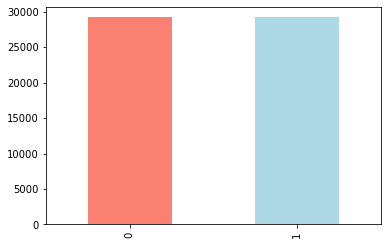

In [50]:
Data["y"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

## Standard scaler

In [51]:
# import module
from sklearn.preprocessing import StandardScaler
  
# create data
Data=Data
  
# scale features
scaler = StandardScaler()
model=scaler.fit(Data)
scaled_data=model.transform(Data)
  
# print scaled features
print(scaled_data)

[[ 0.82689588 -0.50537025 -0.35011204 ... -0.47066532  0.01344715
  -1.        ]
 [ 0.39990172 -0.79114437 -0.35011204 ... -0.47066532  0.01344715
  -1.        ]
 [-0.62488424 -1.07691849 -0.35011204 ... -0.47066532  0.01344715
  -1.        ]
 ...
 [-0.20293554 -0.62293155 -0.35011204 ...  4.15898424  2.27105771
   1.        ]
 [-0.62488424 -0.02664655 -0.21141163 ... -0.47066532  0.01344715
   1.        ]
 [-1.32534852  1.69492828  1.35792723 ...  1.27018778  2.27105771
   1.        ]]


In [52]:
scaled_data

array([[ 0.82689588, -0.50537025, -0.35011204, ..., -0.47066532,
         0.01344715, -1.        ],
       [ 0.39990172, -0.79114437, -0.35011204, ..., -0.47066532,
         0.01344715, -1.        ],
       [-0.62488424, -1.07691849, -0.35011204, ..., -0.47066532,
         0.01344715, -1.        ],
       ...,
       [-0.20293554, -0.62293155, -0.35011204, ...,  4.15898424,
         2.27105771,  1.        ],
       [-0.62488424, -0.02664655, -0.21141163, ..., -0.47066532,
         0.01344715,  1.        ],
       [-1.32534852,  1.69492828,  1.35792723, ...,  1.27018778,
         2.27105771,  1.        ]])

In [53]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int8

In [54]:
Data["y"].value_counts()

0    29202
1    29202
Name: y, dtype: int64

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32950, 10), (8238, 10), (32950,), (8238,))

In [56]:
Data

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome,y
0,50.000000,3.000000,2.000000,2.0,3.000000,1.0,595.000000,999.000000,0.000000,2.000000,0
1,45.000000,2.000000,2.000000,2.0,3.000000,1.0,162.000000,999.000000,0.000000,2.000000,0
2,33.000000,1.000000,2.000000,1.0,1.000000,1.0,98.000000,999.000000,0.000000,2.000000,0
3,55.000000,10.000000,2.000000,2.0,1.000000,1.0,180.000000,999.000000,0.000000,2.000000,0
4,57.000000,1.000000,1.000000,2.0,1.000000,1.0,399.000000,999.000000,0.000000,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
58399,28.338992,8.615827,3.000000,1.0,1.553669,1.0,676.000000,999.000000,0.276835,1.723165,1
58400,32.515630,1.515630,2.484370,1.0,3.000000,1.0,350.515630,999.000000,0.000000,2.000000,1
58401,37.940919,2.588622,2.000000,1.0,1.940919,1.0,550.411378,7.236324,3.059081,3.000000,1
58402,33.000000,4.675182,2.081204,1.0,3.000000,1.0,180.837591,999.000000,0.000000,2.000000,1


In [57]:
y.tail()

41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int8

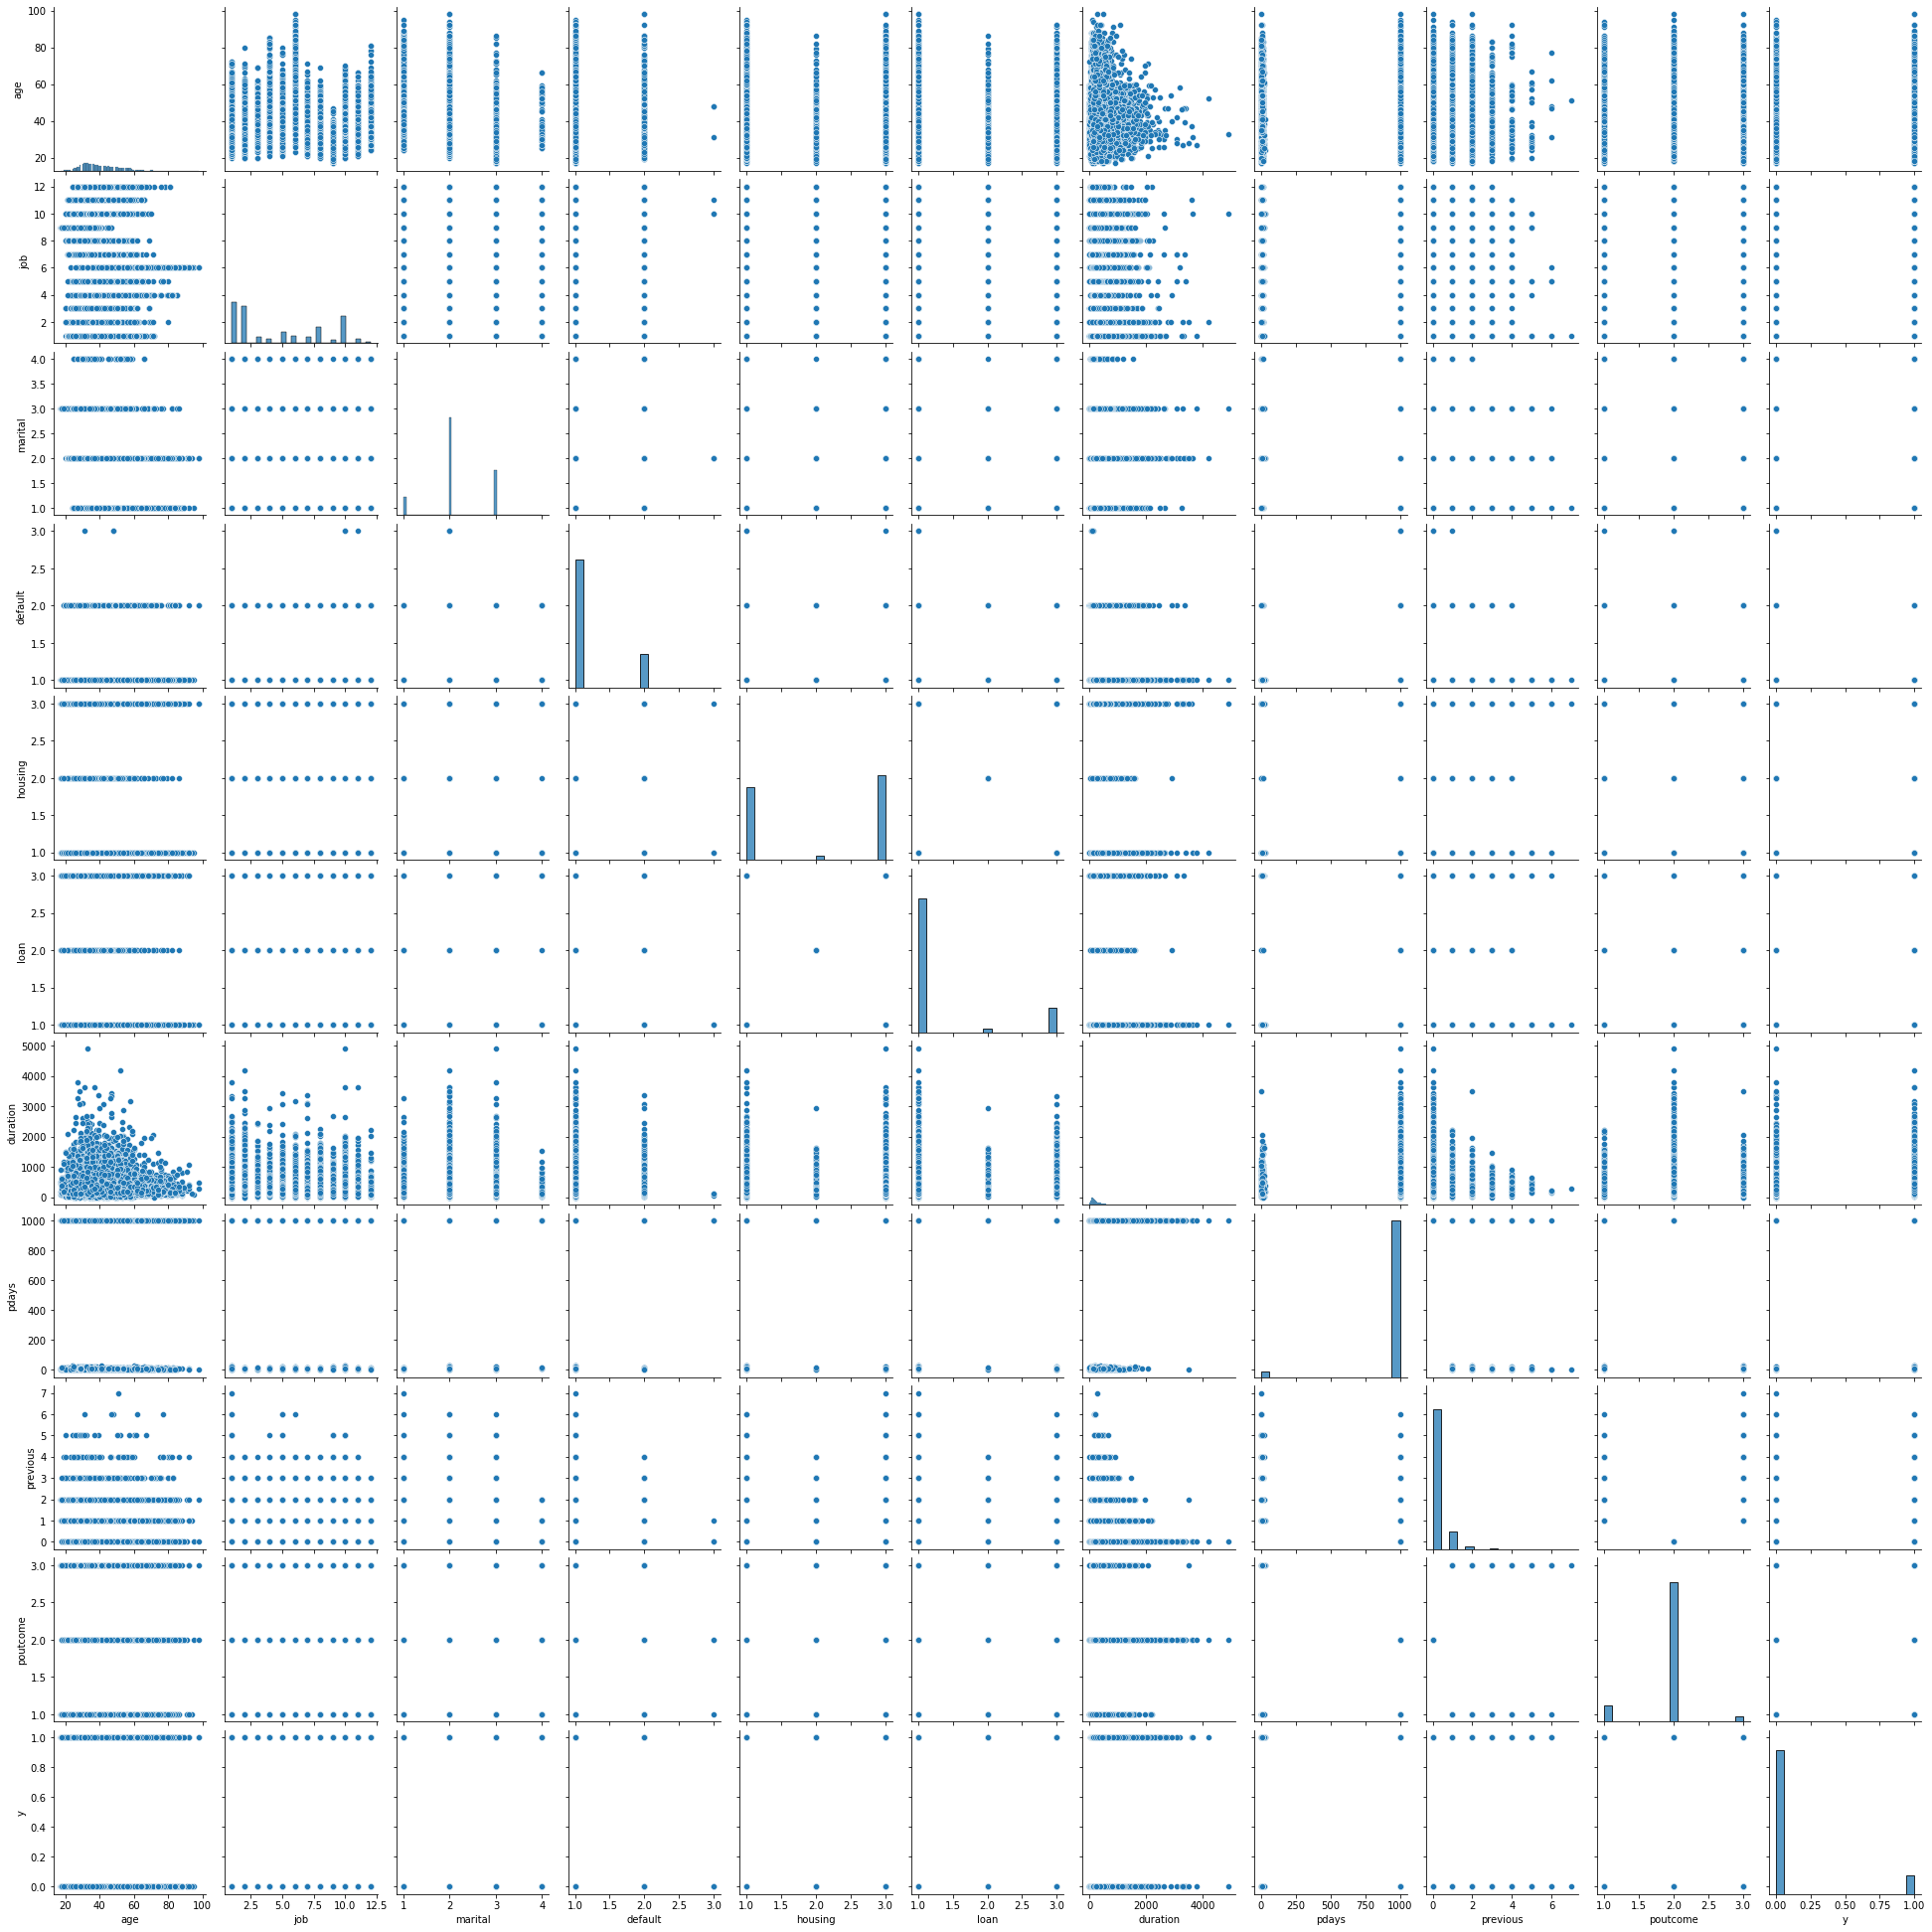

In [58]:
sns.pairplot(df)

## modelling

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train_over, x_test, y_train_over, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
x_train_over.shape, y_train_over.shape , x_test.shape , y_test.shape

((32950, 10), (32950,), (8238, 10), (8238,))

## KNeighborsClassifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
kn=  KNeighborsClassifier()  #initialize model
kn.fit(x_train_over, y_train_over) #fit model
preds = kn.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score , f1_score

In [65]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[7068,  235],
       [ 598,  337]], dtype=int64)

In [66]:
pd.crosstab(y_test,preds )
print(accuracy_score(y_test, preds))

0.8988832240835154


In [67]:
Data.describe()

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome,y
count,58404.000000,58404.000000,58404.000000,58404.000000,58404.000000,58404.000000,58404.000000,58404.000000,58404.000000,58404.000000,58404.000000
mean,40.317246,4.768426,2.204979,1.160516,2.082362,1.320067,385.306688,885.626432,0.310996,1.994044,0.500000
std,11.709862,3.499297,0.585472,0.351062,0.914228,0.666333,357.248762,315.830170,0.660764,0.442950,0.500004
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,31.473638,1.522483,2.000000,1.000000,1.000000,1.000000,144.000000,999.000000,0.000000,2.000000,0.000000
50%,37.604635,4.000000,2.000000,1.000000,2.318866,1.000000,263.000000,999.000000,0.000000,2.000000,0.500000
75%,48.000000,8.000000,2.951109,1.000000,3.000000,1.000000,522.958945,999.000000,0.092615,2.000000,1.000000
max,98.000000,12.000000,4.000000,3.000000,3.000000,3.000000,3631.000000,999.000000,7.000000,3.000000,1.000000


In [68]:
Data.value_counts("default")

default
1.000000    46965
2.000000     7350
1.664239        1
1.660121        1
1.660604        1
            ...  
1.325447        1
1.325702        1
1.325841        1
1.326113        1
3.000000        1
Length: 4091, dtype: int64

In [69]:
kn.fit(x_train_over, y_train_over)

KNeighborsClassifier()

In [70]:
predicted_over = kn.predict(x_test)

In [71]:
pd.crosstab(y_test, predicted_over)

col_0,0,1
y,,
0,7068,235
1,598,337


In [72]:
accuracy_score(y_test, predicted_over)

0.8988832240835154

In [73]:
Data.value_counts("loan")

loan
1.000000    44883
3.000000     5614
2.000000      793
1.000525        1
2.252995        1
            ...  
1.586522        1
1.586030        1
1.585968        1
1.585898        1
1.899171        1
Length: 7117, dtype: int64

In [74]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)
print(df_shuffled)

       age  job  marital  default  housing  loan  duration  pdays  previous  \
32884   57   10        2        1        1     3       371    999         1   
3169    55   12        2        2        3     1       285    999         0   
32206   33    2        2        1        1     1        52    999         1   
9403    36    1        2        1        1     1       355    999         0   
14020   27    4        2        1        3     1       189    999         0   
...    ...  ...      ...      ...      ...   ...       ...    ...       ...   
6265    58    6        2        2        1     1       427    999         0   
11284   37    5        2        1        1     1       288    999         0   
38158   35    1        2        1        3     1       194      4         1   
860     40    5        2        1        3     1       295    999         0   
15795   29    1        3        1        3     1       333    999         0   

       poutcome  y  
32884         1  0  
3169     

In [75]:
over_90=Data[Data["duration"]>90]
over_90.head()

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome,y
0,50.0,3.0,2.0,2.0,3.0,1.0,595.0,999.0,0.0,2.0,0
1,45.0,2.0,2.0,2.0,3.0,1.0,162.0,999.0,0.0,2.0,0
2,33.0,1.0,2.0,1.0,1.0,1.0,98.0,999.0,0.0,2.0,0
3,55.0,10.0,2.0,2.0,1.0,1.0,180.0,999.0,0.0,2.0,0
4,57.0,1.0,1.0,2.0,1.0,1.0,399.0,999.0,0.0,2.0,0


In [76]:
Data["duration"].describe()

count    58404.000000
mean       385.306688
std        357.248762
min          0.000000
25%        144.000000
50%        263.000000
75%        522.958945
max       3631.000000
Name: duration, dtype: float64

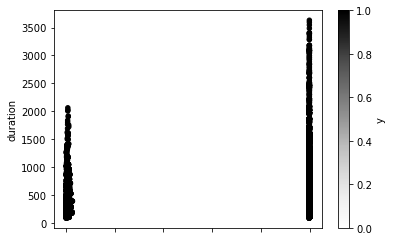

In [77]:
# plotting scatter plots only for 50 years above age
over_90.plot(kind="scatter",
            x="pdays",
            y="duration",
            c="y");

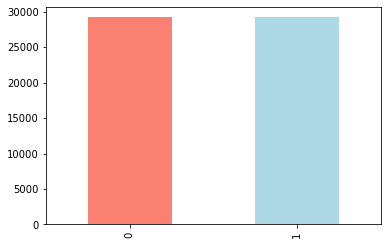

In [78]:
Data["y"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [79]:
Data.corr()

,age,job,marital,default,housing,loan,duration,pdays,previous,poutcome,y
age,1.000000,-0.003191,-0.456627,0.124453,0.000238,-0.001893,-0.017841,-0.059982,0.065931,0.028309,0.035006
job,-0.003191,1.000000,0.035149,-0.036987,0.012013,-0.004574,-0.022541,-0.040780,0.042334,0.013202,0.021134
marital,-0.456627,0.035149,1.000000,-0.099129,0.018416,0.000737,-0.008632,-0.037856,0.033500,0.018427,0.073218
default,0.124453,-0.036987,-0.099129,1.000000,-0.021718,-0.005651,0.020801,0.129841,-0.141062,-0.037884,-0.180910
housing,0.000238,0.012013,0.018416,-0.021718,1.000000,0.048061,-0.008793,-0.008910,0.015154,-0.004505,0.015550
loan,-0.001893,-0.004574,0.000737,-0.005651,0.048061,1.000000,0.014996,-0.006295,0.001481,0.005245,-0.010248
duration,-0.017841,-0.022541,-0.008632,0.020801,-0.008793,0.014996,1.000000,0.026141,-0.045949,0.005913,0.460282
pdays,-0.059982,-0.040780,-0.037856,0.129841,-0.008910,-0.006295,0.026141,1.000000,-0.752084,-0.693143,-0.311929
previous,0.065931,0.042334,0.033500,-0.141062,0.015154,0.001481,-0.045949,-0.752084,1.000000,0.178186,0.271655
poutcome,0.028309,0.013202,0.018427,-0.037884,-0.004505,0.005245,0.005913,-0.693143,0.178186,1.000000,0.180601


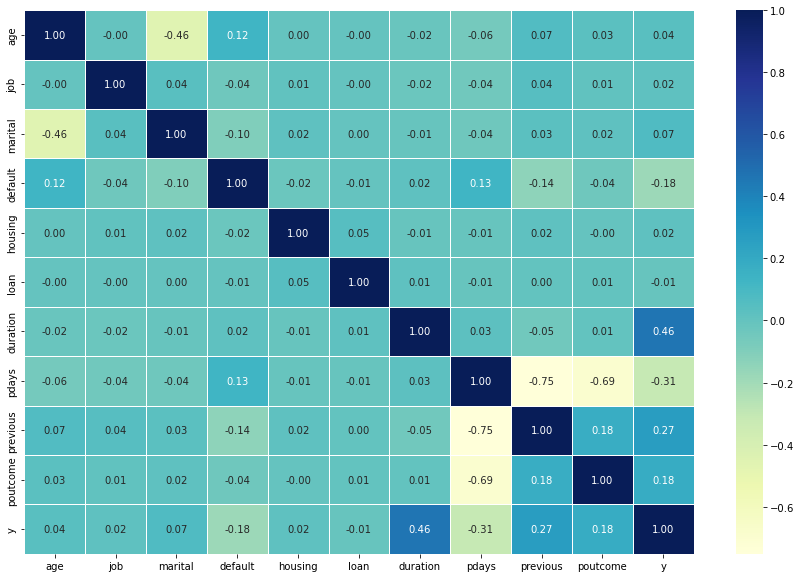

In [80]:
# let us make correlation matrix
corr_matrix=Data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

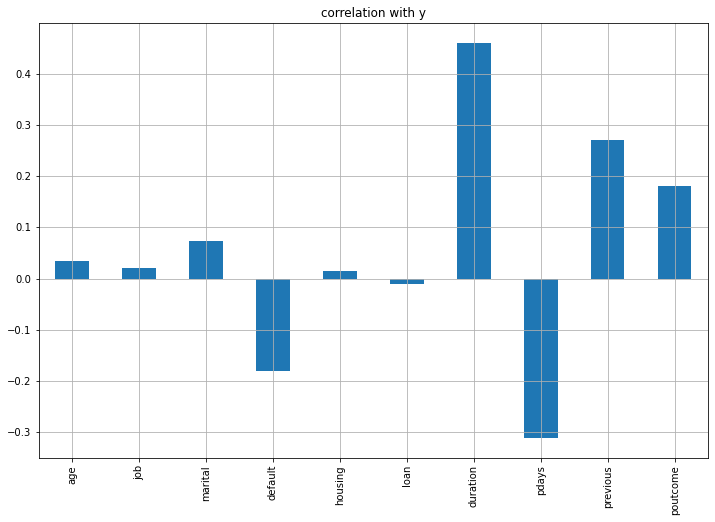

In [81]:
Data.drop("y", axis=1).corrwith(Data.y).plot(kind="bar", grid=True, figsize=(12,8),
                                         title="correlation with y");

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
x_train_over.shape, y_train_over.shape

((32950, 10), (32950,))

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x.shape
x_new = SelectKBest(chi2, k=2).fit_transform(x, y)
x_new.shape

(41188, 2)

In [85]:
from sklearn import tree

In [86]:
models ={"lr":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "SGD":SGDClassifier(),
        "rf":RandomForestClassifier(),
        "clf":tree.DecisionTreeClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(x_train_over,y_train_over)
        model_scores[name]= model.score(x_test,y_test)
    return model_scores

In [87]:
model_scores =fit_and_score(models=models,
                           x_train=x_train_over,
                           x_test= x_test,
                           y_train=y_train_over,
                           y_test= y_test)
model_scores

{'lr': 0.907016266084001,
 'KNN': 0.8988832240835154,
 'SGD': 0.8941490653071134,
 'rf': 0.8964554503520272,
 'clf': 0.8588249575139597}

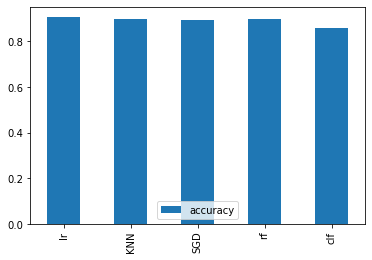

In [88]:
#compare model accuracy
model_compare =pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [89]:
rf= RandomForestClassifier()
rf.fit(x_train_over, y_train_over)

RandomForestClassifier()

In [90]:
sgd= SGDClassifier()
sgd.fit(x_train_over, y_train_over)

SGDClassifier()

In [91]:
lr= LogisticRegression()
lr.fit(x_train_over, y_train_over)

LogisticRegression()

In [92]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train_over,y_train_over)

DecisionTreeClassifier()

In [93]:
KNN=KNeighborsClassifier()
KNN.fit(x_train_over,y_train_over)

KNeighborsClassifier()

## training of differernt estimators

* random forest classifier

In [94]:
train_scores=[]
test_scores=[]
n_estimators=range(1,21)
max_leaf_nodes=3
warm_start=True
min_impurity_split=3
rf=RandomForestClassifier()
for i in n_estimators:
    rf.set_params(n_estimators=i)
    rf.fit(x_train_over,y_train_over)
    train_scores.append(rf.score(x_train_over,y_train_over))
    test_scores.append(rf.score(x_test,y_test))

In [95]:
train_scores

[0.9486191198786039,
 0.9532928679817906,
 0.9732321699544765,
 0.9705007587253415,
 0.9823368740515933,
 0.9799089529590288,
 0.9862215477996965,
 0.9850986342943854,
 0.9905007587253414,
 0.9875265553869499,
 0.9912291350531107,
 0.9903186646433991,
 0.9933839150227618,
 0.9915629742033384,
 0.9937481031866464,
 0.9933535660091047,
 0.9954779969650986,
 0.9942943854324734,
 0.9955690440060698,
 0.9948406676783005]

In [96]:
test_scores

[0.8613741199320223,
 0.8896576839038601,
 0.8803107550376305,
 0.8918426802621996,
 0.8867443554260743,
 0.8929351784413693,
 0.8909929594561787,
 0.8928137897547949,
 0.8896576839038601,
 0.894634620053411,
 0.8912357368293276,
 0.8962126729788784,
 0.8908715707696043,
 0.8964554503520272,
 0.889900461277009,
 0.894027676620539,
 0.8918426802621996,
 0.8951201747997086,
 0.8937848992473901,
 0.8908715707696043]

In [97]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Maximum rf score on test data:89.65%


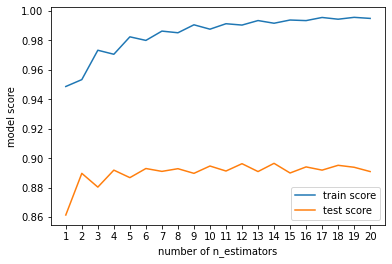

In [98]:
plt.plot(n_estimators,train_scores, label="train score")
plt.plot(n_estimators, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_estimators")
plt.ylabel("model score")
plt.legend()
print(f"Maximum rf score on test data:{max(test_scores)*100:.2f}%")

* decision tree

In [99]:
from sklearn import tree
np.random.seed(42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_over,y_train_over)
clf.score(x_test,y_test)

0.8589463462005341

In [100]:
train_scores=[]
test_scores=[]
max_depth=range(1,21)
clf=tree.DecisionTreeClassifier()
for i in max_depth:
    clf.set_params(max_depth=i)
    clf.fit(x_train_over,y_train_over)
    train_scores.append(clf.score(x_train_over,y_train_over))
    test_scores.append(clf.score(x_test,y_test))

In [101]:
train_scores

[0.887556904400607,
 0.901122913505311,
 0.9072534142640364,
 0.9077693474962064,
 0.9084370257966616,
 0.9104400606980273,
 0.9126858877086494,
 0.914597875569044,
 0.9178148710166919,
 0.921578148710167,
 0.9256752655538695,
 0.9307435508345979,
 0.9370257966616085,
 0.942701062215478,
 0.9489529590288316,
 0.9555386949924127,
 0.9627617602427921,
 0.9688315629742034,
 0.9750227617602428,
 0.980030349013657]

In [102]:
test_scores

[0.8865015780529255,
 0.900825443068706,
 0.9077445982034474,
 0.9072590434571498,
 0.9044671036659383,
 0.907016266084001,
 0.9054382131585337,
 0.906409322651129,
 0.9036173828599174,
 0.9027676620538966,
 0.9007040543821316,
 0.9009468317552805,
 0.8949987861131342,
 0.8924496236950716,
 0.8920854576353484,
 0.8874726875455208,
 0.8856518572469045,
 0.8820101966496723,
 0.8764263170672494,
 0.8708424374848264]

Maximum clf score on test data:90.77%


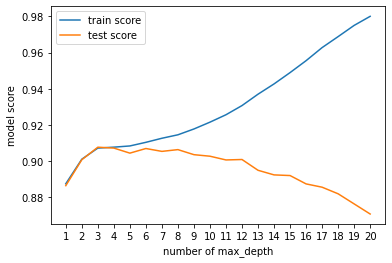

In [103]:
plt.plot(max_depth,train_scores, label="train score")
plt.plot(max_depth ,test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of max_depth")
plt.ylabel("model score")
plt.legend()
print(f"Maximum clf score on test data:{max(test_scores)*100:.2f}%")

* logistic regression

In [104]:
train_scores=[]
test_scores=[]
n_jobs=range(1,21)
lr=LogisticRegression()
for i in n_jobs:
    lr.set_params(n_jobs=i)
    lr.fit(x_train_over,y_train_over)
    train_scores.append(lr.score(x_train_over,y_train_over))
    test_scores.append(lr.score(x_test,y_test))

In [105]:
train_scores

[0.9042792109256449,
 0.9042792109256449,
 0.904309559939302,
 0.904309559939302,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449,
 0.9042792109256449]

In [106]:
test_scores

[0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001,
 0.907016266084001]

Maximum lr score on test data:90.70%


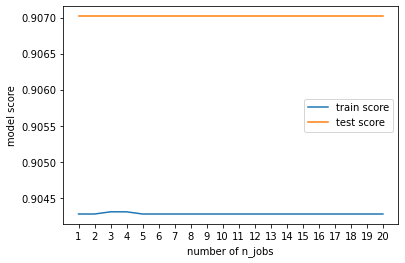

In [107]:
plt.plot(n_jobs,train_scores, label="train score")
plt.plot(n_jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"Maximum lr score on test data:{max(test_scores)*100:.2f}%")

* sgd classifier

In [108]:
train_scores=[]
test_scores=[]
n_jobs=range(1,21)
sgd=SGDClassifier()
for i in n_jobs:
    sgd.set_params(n_jobs=i)
    sgd.fit(x_train_over,y_train_over)
    train_scores.append(sgd.score(x_train_over,y_train_over))
    test_scores.append(sgd.score(x_test,y_test))

In [109]:
train_scores

[0.8714719271623672,
 0.9004855842185129,
 0.8993626707132019,
 0.8982701062215478,
 0.8922913505311078,
 0.8959332321699545,
 0.8986039453717755,
 0.9022458270106222,
 0.8973596358118361,
 0.9022761760242792,
 0.887587253414264,
 0.890804248861912,
 0.8861911987860395,
 0.8977541729893779,
 0.9035811836115326,
 0.9007587253414264,
 0.9057056145675265,
 0.8922610015174507,
 0.9025189681335357,
 0.9060091047040971]

In [110]:
test_scores

[0.8704782714251031,
 0.9003398883224083,
 0.8982762806506434,
 0.8959698956057296,
 0.8912357368293276,
 0.8948773974265598,
 0.8959698956057296,
 0.9024034959941734,
 0.896091284292304,
 0.8999757222626851,
 0.8863801893663511,
 0.8891721291575625,
 0.8854090798737557,
 0.8996115562029618,
 0.902889050740471,
 0.903495994173343,
 0.9060451565914057,
 0.890507404709881,
 0.9007040543821316,
 0.906409322651129]

Maximum sgd score on test data:90.64%


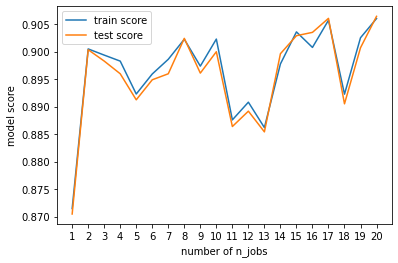

In [111]:
plt.plot(n_jobs,train_scores, label="train score")
plt.plot(n_jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"Maximum sgd score on test data:{max(test_scores)*100:.2f}%")

* KNearestClassifier

In [112]:
train_scores=[]
test_scores=[]
n_jobs=range(1,21)
KNN=KNeighborsClassifier()
for i in n_jobs:
    KNN.set_params(n_jobs=i)
    KNN.fit(x_train_over,y_train_over)
    train_scores.append(KNN.score(x_train_over,y_train_over))
    test_scores.append(KNN.score(x_test,y_test))

In [113]:
train_scores

[0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217,
 0.92051593323217]

In [114]:
test_scores

[0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154,
 0.8988832240835154]

Maximum knn score on test data:89.89%


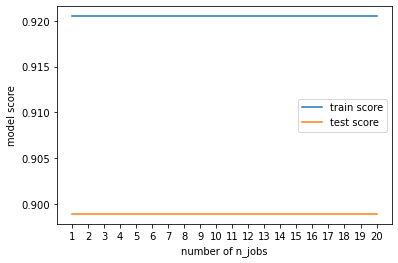

In [115]:
plt.plot(n_jobs,train_scores, label="train score")
plt.plot(n_jobs, test_scores, label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of n_jobs")
plt.ylabel("model score")
plt.legend()
print(f"Maximum knn score on test data:{max(test_scores)*100:.2f}%")

* grid search cv

## logistic regression

In [116]:
# create a hyperparameter grid for logistic regression
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}

In [117]:
# different hyperparameters for logistic regression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
# setup grid hyperparameter search for logistic regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
# fit grid hyperparameter search model
gs_log_reg.fit(x_train_over,y_train_over);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [118]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.004520353656360241, 'solver': 'liblinear'}

In [119]:
# evaluate grid search logistic regression model
gs_log_reg.score(x_test,y_test)

0.9059237679048313

In [120]:
model_scores

{'lr': 0.907016266084001,
 'KNN': 0.8988832240835154,
 'SGD': 0.8941490653071134,
 'rf': 0.8964554503520272,
 'clf': 0.8588249575139597}

In [121]:
# make prediction stuned model
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [122]:
from sklearn.metrics import plot_roc_curve

In [123]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
12322    1
23440    0
29431    0
16627    1
1871     0
Name: y, Length: 8238, dtype: int8

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

In [125]:
from sklearn.metrics import roc_curve

# fit classifier
lr.fit(x_train_over,y_train_over)
# make predictions with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [126]:
y_probs_positive_lr=y_probs[:,1]
y_probs_positive_lr[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
# calculate fpr,tpr, and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive_lr)
# check false positive rates
fpr

array([0.        , 0.06545255, 0.06600027, 0.0661372 , 0.06627413,
       0.06641106, 0.06654799, 0.06668492, 0.06778036, 0.06791729,
       0.06901273, 0.06928659, 0.07366836, 0.07462687, 0.07572231,
       0.0761331 , 0.07668082, 0.07695468, 0.07777626, 0.07832398,
       0.07900863, 0.08325346, 0.08393811, 0.08407504, 0.08475969,
       0.08612899, 0.08653978, 0.08914145, 0.09037382, 0.09092154,
       0.09297549, 0.09407093, 0.09612488, 0.09639874, 0.09680953,
       0.09790497, 0.10091743, 0.10132822, 0.10201287, 0.10256059,
       0.10707928, 0.10844858, 0.11091332, 0.11200876, 0.11392578,
       0.11502122, 0.11611666, 0.11844447, 0.12090922, 0.12145694,
       0.12200466, 0.12337396, 0.12542791, 0.12693414, 0.12967274,
       0.13158976, 0.13295906, 0.13569766, 0.13597152, 0.13761468,
       0.14240723, 0.14336574, 0.14473504, 0.14692592, 0.14747364,
       0.14856908, 0.14897987, 0.15021224, 0.15240312, 0.15568944,
       0.1573326 , 0.15842804, 0.16513761, 0.16568533, 0.16705

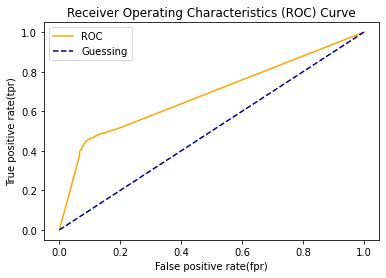

In [128]:
# create a function to plotting roc curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange", label="ROC")
    # plot line with no predictive power 
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label="Guessing")
    # customize plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve (fpr,tpr)

In [129]:
roc_auc_score(y_test,y_probs_positive_lr)

0.683079695473474

In [130]:
from sklearn.metrics import confusion_matrix
y_preds=lr.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[7149,  154],
       [ 612,  323]], dtype=int64)

In [131]:
# visaulaize confusion matrix with pd.crosstab
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,7149,154
1,612,323


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.68      0.35      0.46       935

    accuracy                           0.91      8238
   macro avg       0.80      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



## random forest classifier

In [133]:
grid={"n_estimators":[100,200,500],
     "max_depth":[None],
     "max_features":["auto","sqrt"],
     "min_samples_split":[6],
     "min_samples_leaf":[1,2]}

In [134]:
np.random.seed(42)
x_train_over,x_test,y_train_over,y_test=train_test_split(x,y,test_size=0.2)
rf=RandomForestClassifier(n_jobs=1)
gs_rf=GridSearchCV(estimator=rf,
                  param_grid=grid,
                  cv=5,
                  verbose=2)
gs_rf.fit(x_train_over,y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   3.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   3.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [135]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [136]:
gs_rf.score(x_test,y_test)

0.9041029376062151

In [137]:
gs_y_preds=gs_rf.predict(x_test)
gs_y_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [138]:
# fit classifier
rf.fit(x_train,y_train)
# make predictions with probabilities
y_probs=rf.predict_proba(x_test)
y_probs[:10]

array([[0.8 , 0.2 ],
       [1.  , 0.  ],
       [0.78, 0.22],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.92, 0.08],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [139]:
y_probs_positive_rf=y_probs[:,1]
y_probs_positive_rf[:10]

array([0.2 , 0.  , 0.22, 0.  , 0.01, 0.08, 0.  , 0.  , 0.  , 0.  ])

In [140]:
# calculate fpr,tpr, and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive_rf)
# check false positive rates
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.36930029e-04, 1.36930029e-04,
       1.36930029e-04, 2.73860058e-04, 4.10790086e-04, 5.47720115e-04,
       5.47720115e-04, 5.47720115e-04, 5.47720115e-04, 5.47720115e-04,
       6.84650144e-04, 6.84650144e-04, 8.21580173e-04, 8.21580173e-04,
       8.21580173e-04, 8.21580173e-04, 9.58510201e-04, 9.58510201e-04,
       9.58510201e-04, 1.09544023e-03, 1.23237026e-03, 1.36930029e-03,
       1.64316035e-03, 1.64316035e-03, 1.91702040e-03, 2.05395043e-03,
       2.05395043e-03, 2.05395043e-03, 2.32781049e-03, 2.46474052e-03,
       2.73860058e-03, 3.01246063e-03, 3.28632069e-03, 3.56018075e-03,
       4.24483089e-03, 4.38176092e-03, 4.51869095e-03, 4.51869095e-03,
       4.65562098e-03, 4.79255101e-03, 5.34027112e-03, 5.75106121e-03,
       6.02492127e-03, 6.29878132e-03, 6.43571135e-03, 6.98343147e-03,
       7.39422155e-03, 7.39422155e-03, 8.21580173e-03, 8.35273175e-03,
      

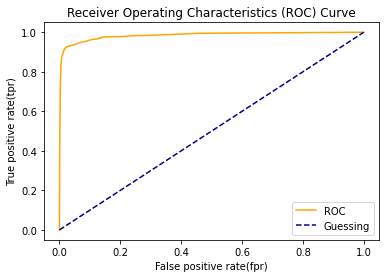

In [141]:
# create a function to plotting roc curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange", label="ROC")
    # plot line with no predictive power 
    plt.plot([0,1],[0,1],color="darkblue", linestyle="--",label="Guessing")
    # customize plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve (fpr,tpr)

In [142]:
roc_auc_score(y_test,y_probs_positive_rf)

0.9841858997218197

In [143]:
from sklearn.metrics import confusion_matrix
y_preds=rf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[7242,   61],
       [ 115,  820]], dtype=int64)

In [144]:
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,7242,61
1,115,820


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7303
           1       0.93      0.88      0.90       935

    accuracy                           0.98      8238
   macro avg       0.96      0.93      0.95      8238
weighted avg       0.98      0.98      0.98      8238



In [146]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive_rf)

0.9841858997218197

In [147]:
from sklearn.metrics import confusion_matrix
y_preds=rf.predict(x_test)
confusion_matrix(y_preds,y_test)

array([[7242,  115],
       [  61,  820]], dtype=int64)

In [148]:
pd.crosstab(y_preds,y_test)

y,0,1
row_0,,
0,7242,115
1,61,820


In [149]:
from sklearn.model_selection import cross_val_score
rf= RandomForestClassifier(n_estimators=100)

In [150]:
# set random seed 
np.random.seed(42)
cv_acc = cross_val_score(rf, x, y, cv=5)
cv_acc

array([0.89075018, 0.88674436, 0.89099296, 0.88260289, 0.83464854])

In [151]:
# scoring accuracy
np.random.seed(42)
cv_acc =cross_val_score(rf, x, y, cv=5, scoring="accuracy")
print(f" crosss validated accuracy is:{np.mean(cv_acc)*100:2f}%")

 crosss validated accuracy is:87.714778%


In [152]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
x = df.iloc[:, 0:8]
y = df.iloc[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

## summary
* tried different models
* accuracy, precision, f2 score and recall increased after tuning hyperparameters of random forest calssifier
* accuracy of roc curve is 98%
* dataset was imbalnced to used SMOTE to balance dataset
* the distribution of dataset was transformed by using standard scaler